In [1]:
import platform
print("Python version:", platform.python_version())

Python version: 3.11.5


## Data Preparation

In [2]:
# Any packages that need to be installed
!pip install imbalanced-learn

In [3]:
# Importing libraries for basic data manipulation and visualization
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
# Importing libraries for predictive modeling
import statsmodels.formula.api as smf                # statsmodel
from sklearn.model_selection import train_test_split # train, test, and split
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.ensemble import RandomForestClassifier  # random forest
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import RobustScaler       # robust scaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV     # Hyperparameter tuning
from sklearn.metrics import make_scorer              # model scoring
from sklearn.metrics import roc_curve                # visualize roc curve
from IPython.display import display

In [5]:
# Pandas print options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', 100)

In [6]:
# Load the data
# Assuming csv format for simplicity. Using space as separator after manual inspection of the txt files
# Print random 5 lines of sampled data from each dataframe
historical = pd.read_csv("/Users/sudhaminiguda/Downloads/ds-challenge/data/historical.txt", sep=" ", header=None)
display(historical.sample(n=5))
snapshot = pd.read_csv("/Users/sudhaminiguda/Downloads/ds-challenge/data/snapshot.txt", sep=" ", header=None)
display(snapshot.sample(n=5))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
1856,9,144,0.0003,-0.0005,100.0,518.67,642.58,1593.66,1405.62,14.62,21.61,553.87,2387.99,9091.19,1.3,47.38,521.85,2388.02,8175.20,8.4566,0.03,391,2388,100.0,38.78,23.2728,NaN,NaN
4098,20,165,-0.0001,-0.0002,100.0,518.67,642.64,1601.00,1410.17,14.62,21.61,552.73,2388.17,9065.29,1.3,47.76,520.91,2388.16,8138.59,8.4694,0.03,392,2388,100.0,38.87,23.1233,NaN,NaN
2668,13,123,-0.0016,0.0005,100.0,518.67,643.12,1595.22,1414.96,14.62,21.61,552.75,2388.11,9082.71,1.3,47.57,520.87,2388.12,8162.23,8.5017,0.03,392,2388,100.0,38.65,23.1694,NaN,NaN
5327,27,19,-0.0019,-0.0001,100.0,518.67,642.47,1581.23,1399.50,14.62,21.61,553.43,2388.11,9062.02,1.3,47.42,521.86,2388.04,8142.48,8.4082,0.03,393,2388,100.0,38.80,23.3244,NaN,NaN
10397,53,63,0.0007,0.0001,100.0,518.67,642.57,1584.07,1401.63,14.62,21.61,553.18,2388.04,9066.16,1.3,47.42,521.90,2388.10,8144.21,8.4335,0.03,394,2388,100.0,38.84,23.3984,NaN,NaN


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
12121,93,139,-0.0015,-0.0004,100.0,518.67,643.04,1590.19,1416.55,14.62,21.61,552.87,2388.04,9061.28,1.3,47.34,521.03,2388.09,8141.47,8.4795,0.03,395,2388,100.0,38.71,23.3246,NaN,NaN
3087,27,26,0.0001,0.0004,100.0,518.67,641.48,1585.01,1389.83,14.62,21.61,554.05,2388.05,9052.51,1.3,47.22,522.24,2387.99,8133.15,8.3908,0.03,391,2388,100.0,38.94,23.4696,NaN,NaN
1802,16,98,0.0011,0.0002,100.0,518.67,642.25,1580.70,1399.41,14.62,21.61,553.80,2388.02,9056.60,1.3,47.30,521.94,2388.12,8144.09,8.3987,0.03,393,2388,100.0,38.97,23.4254,NaN,NaN
7149,56,80,0.0006,-0.0002,100.0,518.67,643.03,1602.45,1409.77,14.62,21.61,552.70,2388.17,9045.83,1.3,47.73,521.05,2388.12,8125.81,8.4921,0.03,393,2388,100.0,38.94,23.2214,NaN,NaN
10080,77,161,-0.0013,0.0004,100.0,518.67,643.02,1596.00,1411.87,14.62,21.61,552.78,2388.15,9043.86,1.3,47.91,520.95,2388.17,8124.02,8.4664,0.03,394,2388,100.0,38.75,23.2021,NaN,NaN


In [7]:
# Get the dataframe info for historical and snapshot data to check for column names, null columns and data types
display(historical.info())
display(snapshot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13096 non-null  int64  
 1   1       13096 non-null  int64  
 2   2       13096 non-null  float64
 3   3       13096 non-null  float64
 4   4       13096 non-null  float64
 5   5       13096 non-null  float64
 6   6       13096 non-null  float64
 7   7       13096 non-null  float64
 8   8       13096 non-null  float64
 9   9       13096 non-null  float64
 10  10      13096 non-null  float64
 11  11      13096 non-null  float64
 12  12      13096 non-null  float64
 13  13      13096 non-null  float64
 14  14      13096 non-null  float64
 15  15      13096 non-null  float64
 16  16      13096 non-null  float64
 17  17      13096 non-null  float64
 18  18      13096 non-null  float64
 19  19      13096 non-null  float64
 20  20      13096 non-null  float64
 21  21      13096 non-null  int64  
 22

None

* Some observations - the last two columns are empty in both the datasets and the columns do no have any names. The two empty columns need to be dropped and names for the columns need to be constructed

In [8]:
# Removing last two empty columns from historical and snapshot dataframes
historical = historical.iloc[:, :-2]
snapshot = snapshot.iloc[:, :-2]

Since dataframe doesn't have column names, we assign column names based on description

- first column is equipment_unit_id
- second column is unit_operating_cycle
- rest are all sensor values - naming them as sensor_1, sensor_2 ...., sensor_N

In [9]:
# construct sensor names list
num_sensors = historical.shape[1] - 2  # subtracting two for unit_equipment_id and unit_operating_cycle columns
sensor_names = [f'sensor_{i}' for i in range(1, num_sensors + 1)]

In [10]:
# Construct column names list
column_names = ['equipment_unit_id', 'unit_operating_cycle'] + sensor_names

In [11]:
# Assign column names to historical and snapshot dataframes
historical.columns = column_names
display(historical.columns)
snapshot.columns = column_names
display(snapshot.columns)

Index(['equipment_unit_id', 'unit_operating_cycle', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18',
       'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24'],
      dtype='object')

Index(['equipment_unit_id', 'unit_operating_cycle', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18',
       'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24'],
      dtype='object')

#### Now let's do all the exploration, preprocessing and analysis on historical dataset

In [12]:
row_count = historical.shape[0] # 0 for row
print("Number of rows:", row_count)

column_count = historical.shape[1] # 1 for column
print("Number of columns:", column_count)

Number of rows: 20631
Number of columns: 26


In [13]:
# total number of unique equipment units
num_unique_units = historical['equipment_unit_id'].nunique()
print(f"Total number of unique equipment units: {num_unique_units}")

Total number of unique equipment units: 100


In [14]:
# Determine the maximum cycle for each equipment unit in the historical data
max_cycle_per_unit = historical.groupby('equipment_unit_id')['unit_operating_cycle'].max()

# Convert the series to a dataframe
df_max_cycle = max_cycle_per_unit.reset_index()
df_max_cycle.columns = ['equipment_unit_id', 'max_cycle']

# Print the result in tabular format
print(df_max_cycle.to_string(index=False))

 equipment_unit_id  max_cycle
                 1        192
                 2        287
                 3        179
                 4        189
                 5        269
                 6        188
                 7        259
                 8        150
                 9        201
                10        222
                11        240
                12        170
                13        163
                14        180
                15        207
                16        209
                17        276
                18        195
                19        158
                20        234
                21        195
                22        202
                23        168
                24        147
                25        230
                26        199
                27        156
                28        165
                29        163
                30        194
                31        234
                32        191
          

#### Let's plot bar chart to compare the ranges of maximum cycles each equipment unit ran before breaking down

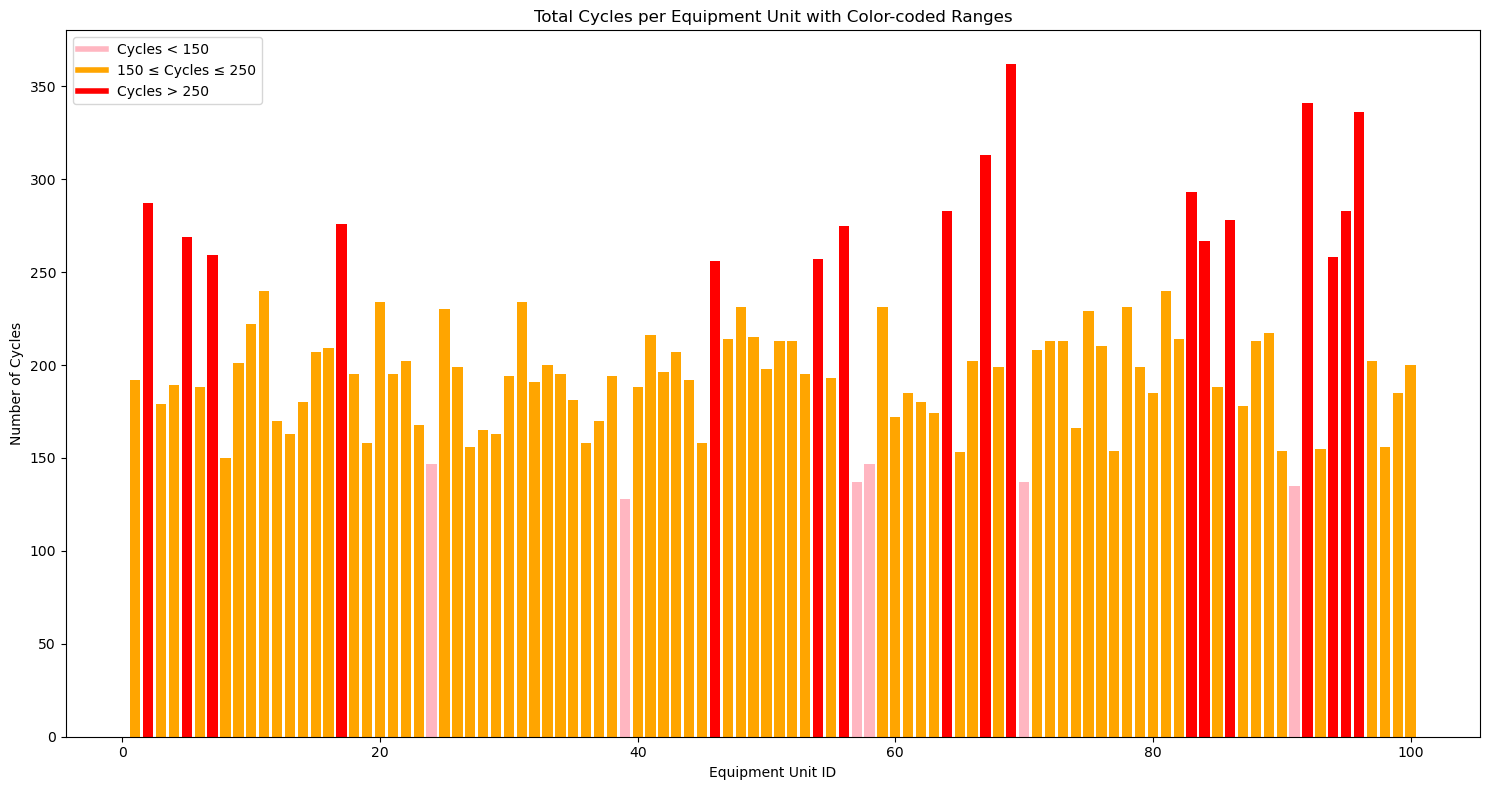

In [15]:
# Define the color based on the range of max_cycle
def assign_color(value):
    if value < 150:
        return 'lightpink'
    elif 150 <= value <= 250:
        return 'orange'
    else:
        return 'red'

colors = [assign_color(x) for x in df_max_cycle['max_cycle']]

plt.figure(figsize=(15, 8))
bars = plt.bar(df_max_cycle['equipment_unit_id'], df_max_cycle['max_cycle'], color=colors)

# Add legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='lightpink', lw=4, label='Cycles < 150'),
                   Line2D([0], [0], color='orange', lw=4, label='150 ≤ Cycles ≤ 250'),
                   Line2D([0], [0], color='red', lw=4, label='Cycles > 250')]
plt.legend(handles=legend_elements, loc='upper left')

plt.title('Total Cycles per Equipment Unit with Color-coded Ranges')
plt.xlabel('Equipment Unit ID')
plt.ylabel('Number of Cycles')
plt.tight_layout()
plt.show()

#### Let's plot a histogram to check the distribution of number of cycles for equipment units 

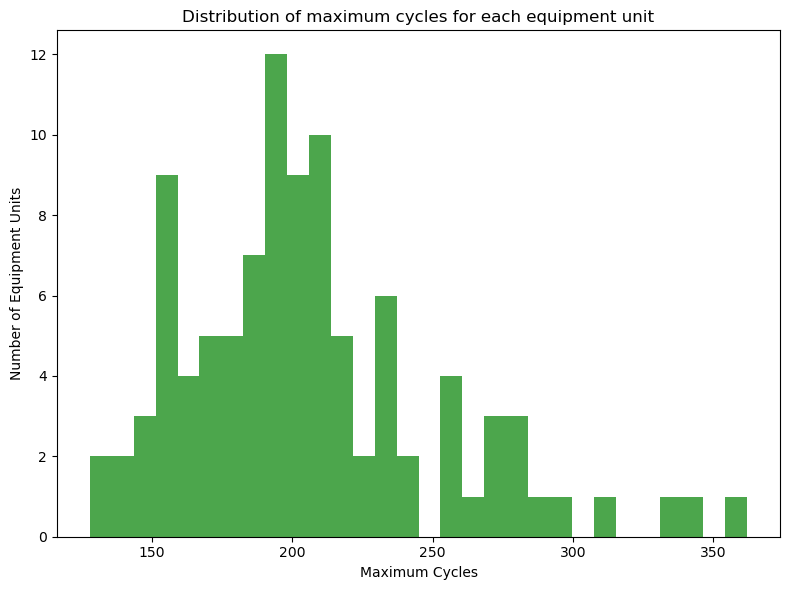

In [16]:
# Histogram plot to check how many cycles

plt.figure(figsize=(8, 6))
plt.hist(df_max_cycle['max_cycle'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of maximum cycles for each equipment unit')
plt.xlabel('Maximum Cycles')
plt.ylabel('Number of Equipment Units')
plt.tight_layout()
plt.show()

We see from the above graph that maximum number of equipment units run for 200 cycles before failure.

#### Creating a new column failure_within_20 to determine failure within next 20 cycles

In [17]:
# If the maximum cycle of a unit is within 20 of its last observed cycle, label it as 1 (will fail), else 0
historical['failure_within_20'] = historical.apply(lambda row: 1 if row['unit_operating_cycle'] >= max_cycle_per_unit[row['equipment_unit_id']] - 20 else 0, axis=1)


In [18]:
# Subset the dataframe to only include the three columns of interest without sensor data
subset_df = historical[['equipment_unit_id', 'unit_operating_cycle', 'failure_within_20']]

# Get a random sample of 10 rows
random_sample = subset_df.sample(n=10, random_state=36)  # Setting random_state for reproducibility

display(random_sample)

,equipment_unit_id,unit_operating_cycle,failure_within_20
3979,20,46,0
10626,54,97,0
14855,74,92,0
16581,82,204,1
9930,51,22,0
4726,23,162,1
11977,61,36,0
18304,90,79,0
12133,62,7,0
421,2,230,0


## Data Preprocessing

 Check if there are any missing values in the historical data - False means there are none.

In [19]:
# Check if any value is missing from the dataframe

has_any_missing = historical.isna().any().any()
print(has_any_missing)

False


#### Let's create a heatmap to know the correlation between various sensors

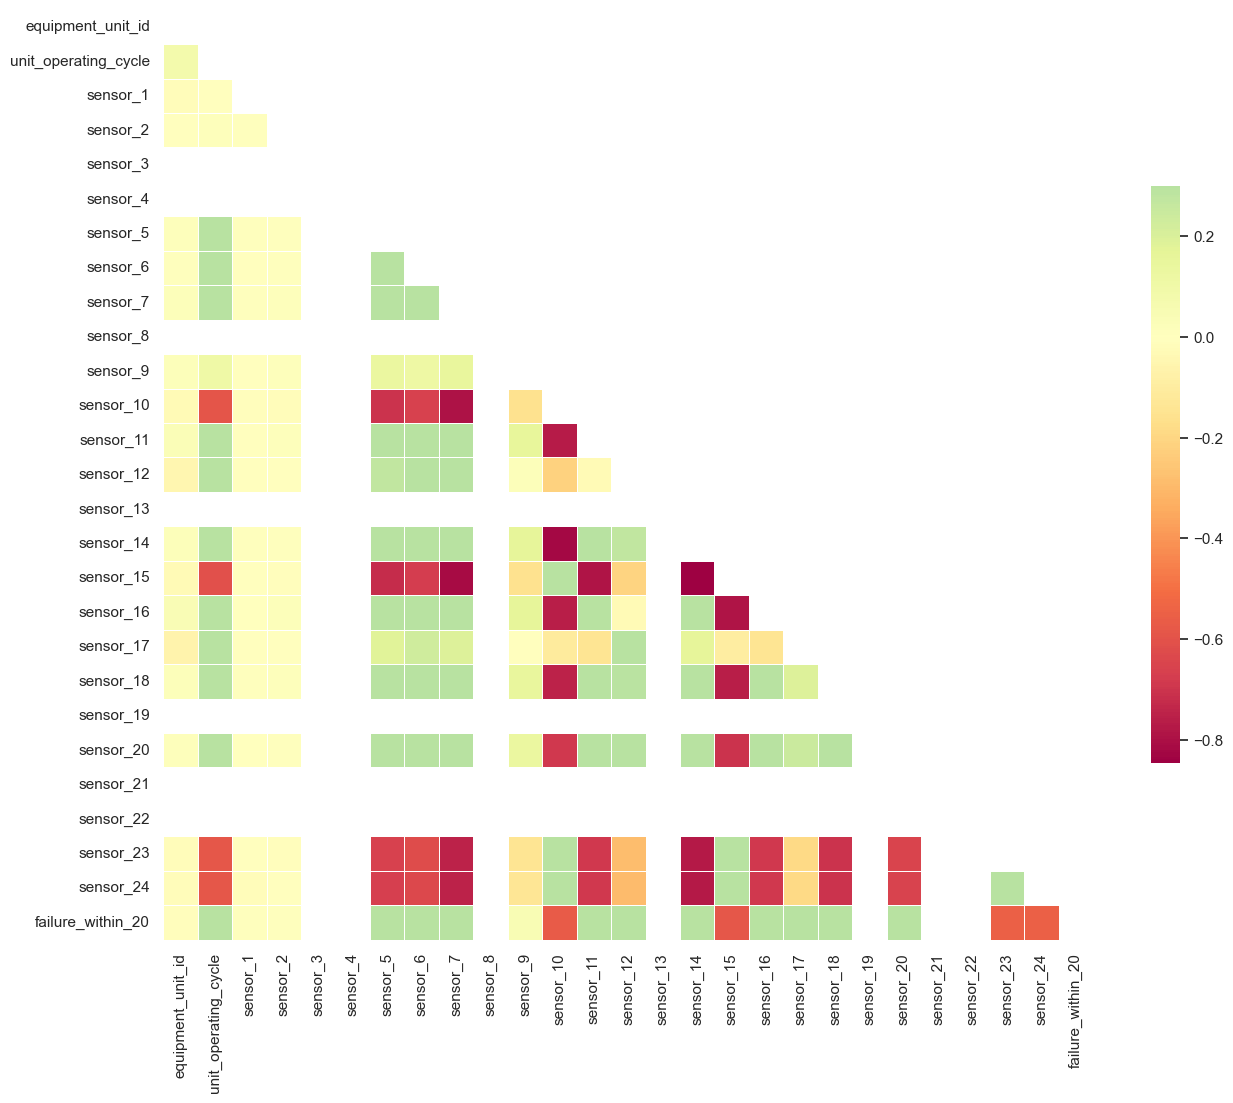

In [20]:
sns.set(style="white")

# Compute the correlation matrix
corr = historical.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = "Spectral"
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

We will remove highly correlated features since they carry similar information. The heatmap created above can be useful here. We observe that the sensors 18 and 19, and 23 and 24 carry similar information. 

* We need remove one of the pairs from (18,19) or (23,24) since I will use tree based model (But they can beremoved for the robustness of the model)

* From heatmap sensors 3,4,8,13,19,21,22 are of very less importance and are not at all related to other variables.

#### Let's graph the range of sensor readings and how often those readings occur

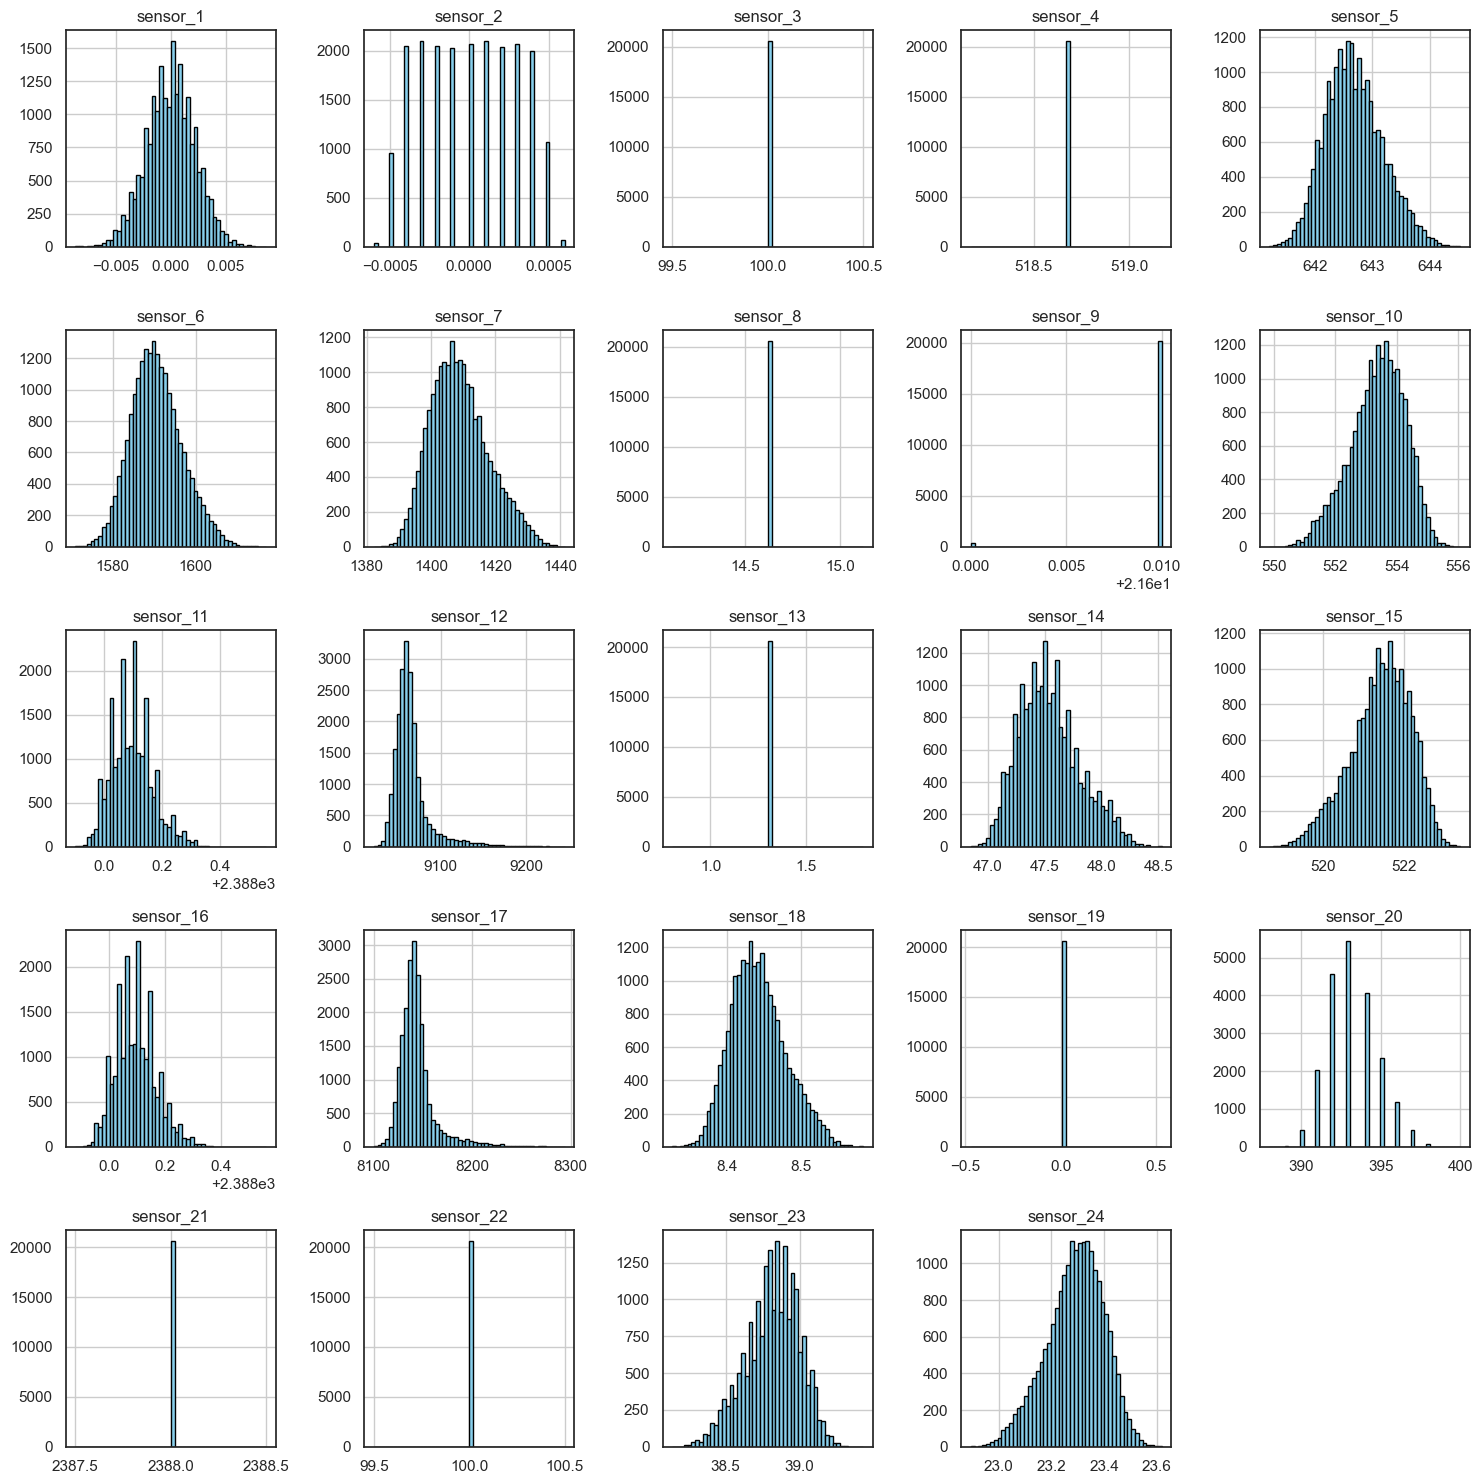

In [21]:
# Histogram to check the frequency

sensor_columns = [col for col in historical.columns if 'sensor' in col]

historical[sensor_columns].hist(figsize=(15, 15), bins=50, color='skyblue', edgecolor='black')
plt.tight_layout()  # Adjusts subplots
plt.show()

#### Check if there are any outliers in the data

In [22]:
# First let's create a copy of the data

temp1 = historical.copy()  # temp1 will be used for all outlier analysis

In [23]:
temp1.shape

(20631, 27)

Since the data does not appear to be normally distributed from the plots above, it is not ideal to use z-test. So I will be using Shapiro-Wilk test.

In [24]:
# Filter out only sensor columns
sensor_columns = temp1.columns[2:-1] 

for column in sensor_columns:
    sensor_data = temp1[column]
    
    shapiro_test_stat, shapiro_p_value = stats.shapiro(sensor_data)
if shapiro_p_value > 0.05:
    print("Shapiro-Wilk: Data appears to be normally distributed (p-value =", shapiro_p_value, ")")
else:
    print("Shapiro-Wilk: Data does not appear to be normally distributed (p-value =", shapiro_p_value, ")")


Shapiro-Wilk: Data does not appear to be normally distributed (p-value = 9.083066889322893e-34 )


/Users/sudhaminiguda/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/sudhaminiguda/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Since the data is not normally distributed and p-value is extremely small, closer to 0, it can be said that there are high number of outliers in the data.

In [25]:
# Isolate sensor columns based on a naming pattern which in our data is sensor_n
#sensor_columns = [col for col in temp1.columns if 'sensor' in col]

# Initialize a boolean Series for outliers with all False values
is_outlier = pd.Series([False] * len(temp1))

# Check for outliers in each sensor column and update the 'is_outlier' series
for col in sensor_columns:
    Q1 = temp1[col].quantile(0.25)
    Q3 = temp1[col].quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = is_outlier | ((temp1[col] < (Q1 - 1.5 * IQR)) | (temp1[col] > (Q3 + 1.5 * IQR)))

# Filter the rows that are outliers in any sensor column
df_outliers = temp1[is_outlier]
print(f"There are {df_outliers.shape[0]} outliers in the historical data")

There are 2913 outliers in the historical data


In [26]:
# Percentage of data with outliers

outliers_pc = round(len(df_outliers)/len(temp1),2)
print(f"{outliers_pc} of historical data has outliers")

0.14 of historical data has outliers


Having 14% of data classified as outliers is relatively high, which again confirms the Non-Guassian distribution of the data.

In [27]:
def detect_outliers(group):
    outlier_count = 0
    for col in sensor_columns:
        Q1 = group[col].quantile(0.25)
        Q3 = group[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = group[(group[col] < (Q1 - 1.5 * IQR)) | (group[col] > (Q3 + 1.5 * IQR))]
        outlier_count += len(outliers)
    return outlier_count

# Get the outlier count for each equipment unit
outlier_counts = temp1.groupby("equipment_unit_id").apply(detect_outliers)


In [28]:
# Calculate the percentage of outliers for each equipment unit
group_sizes = temp1.groupby("equipment_unit_id").size()
outlier_percentages = ((outlier_counts / group_sizes) * 100).round(2)


#### Let's plot the outlier percentages for each equipment unit using scatterplot

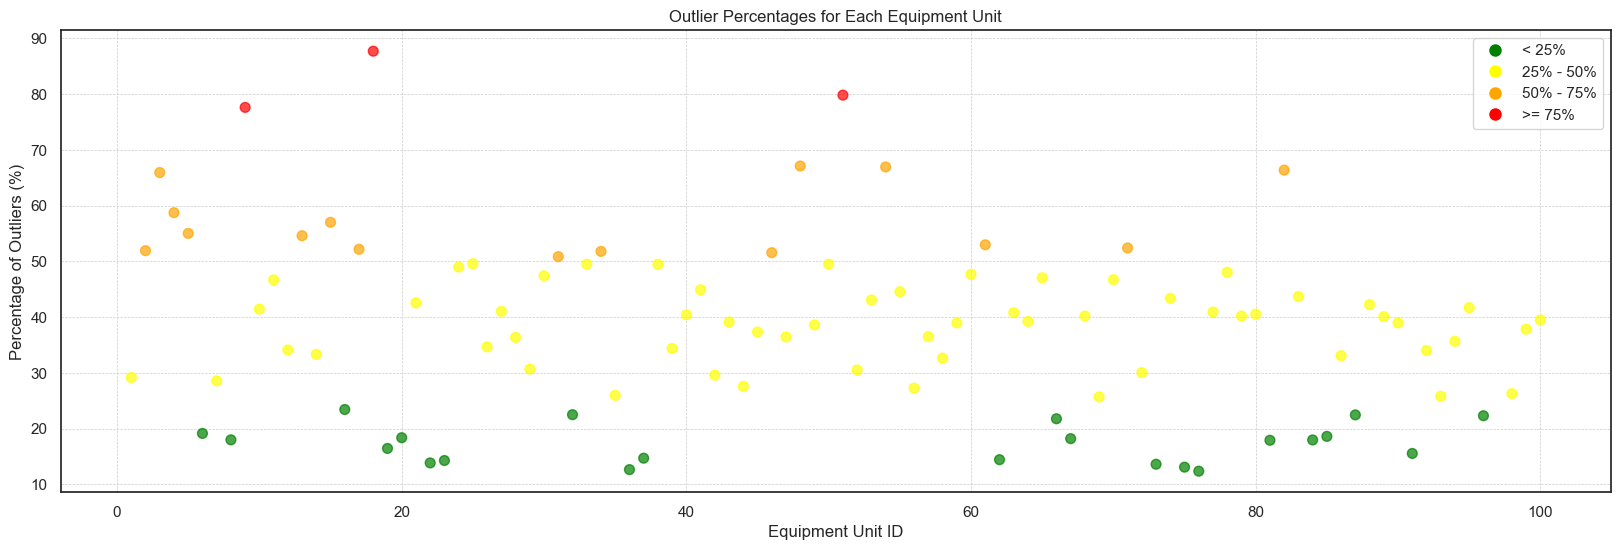

In [29]:
# Define colors based on the percentage of outliers
def assign_colors(value):
    if value < 25:
        return 'green'
    elif 25 <= value < 50:
        return 'yellow'
    elif 50 <= value < 75:
        return 'orange'
    else:
        return 'red'

# Assign colors to each value in the series
colors = outlier_percentages.map(assign_colors)

plt.figure(figsize=(20, 6))
plt.scatter(outlier_percentages.index, outlier_percentages, c=colors, s=50, alpha=0.7)

# Set title, labels, and legend
plt.title('Outlier Percentages for Each Equipment Unit')
plt.xlabel('Equipment Unit ID')
plt.ylabel('Percentage of Outliers (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Creating a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='< 25%', markersize=10, markerfacecolor='green'),
                   Line2D([0], [0], marker='o', color='w', label='25% - 50%', markersize=10, markerfacecolor='yellow'),
                   Line2D([0], [0], marker='o', color='w', label='50% - 75%', markersize=10, markerfacecolor='orange'),
                   Line2D([0], [0], marker='o', color='w', label='>= 75%', markersize=10, markerfacecolor='red')]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()


We see that some of the equipments have very high percentage of outliers. Greater than 75% outliers is concerning but this could also mean that these sensor have different operational behavior from other sensors.

* Ruling out any faulty sensor or data collection errors since most of the data has high percentage of outliers
* Not ruling out that IQR method using to detect outliers might not be suitable since when the distribution is assymmetrical large number of data could be classified as outliers
* Will not use DBSCAN since the percentage will be higher than IQR


Conclusion - keeping all the outliers since they might be useful data

## Feature Scaling

#### Since we see from the frequency histogram plot from above that the data has a skewed distribution, it is important to scale features so that they have similar range

In [30]:
# Create a new copy of the data
temp2 = historical.copy()  # We will use temp2 for feature scaling and feature selection

In [31]:
# I am using Robust Scaler as opposed to Standard or Min Max scaling since it is robust to outliers
scaler = RobustScaler()

# Fit and transform the data
temp2[sensor_columns] = scaler.fit_transform(temp2[sensor_columns])

print(temp2[sensor_columns].head())

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  sensor_9  \
0 -0.233333      -0.8       0.0       0.0 -1.214815 -0.049261 -0.610086       0.0       0.0   
1  0.633333      -0.6       0.0       0.0 -0.725926  0.211823 -0.401804       0.0       0.0   
2 -1.433333       0.6       0.0       0.0 -0.429630 -0.259852 -0.314883       0.0       0.0   
3  0.233333       0.0       0.0       0.0 -0.429630 -0.900246 -0.505945       0.0       0.0   
4 -0.633333      -0.4       0.0       0.0 -0.400000 -0.892857 -0.149241       0.0       0.0   

   sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  sensor_16  sensor_17  \
0   0.766667  -0.333333  -0.886642        0.0  -0.114286   0.181818       -0.7  -0.127448   
1   0.258333  -0.555556  -1.016544        0.0  -0.057143   0.808081       -0.2  -0.600730   
2   0.683333  -0.111111  -0.473039        0.0  -0.685714   0.949495       -0.6  -0.485231   
3   0.841667   0.222222  -0.685049        0.0  -1.085714 

## Feature Selection

We will remove highly correlated features since they carry similar information. The heatmap created above can be useful here. We observe that the sensors 18 and 19, and 23 and 24 carry similar information. 

* We need remove one of the pairs from (18,19) or (23,24) since I will use tree based model (But they can beremoved for the robustness of the model)

* From heatmap sensors 3,4,8,13,19,21,22 are of very less importance and are not at all related to other variables.

#### RandomForest provides a feature importance metric which tells us which features are more important when predicting the target variable. This metric can be easily extracted and used for feature selection. I will be using RandomForestClassifier.

In [32]:
X = temp2.drop(columns=['failure_within_20']) #Since failure_within_20 is our binary target column
y = temp2['failure_within_20']

# Initialize a random forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

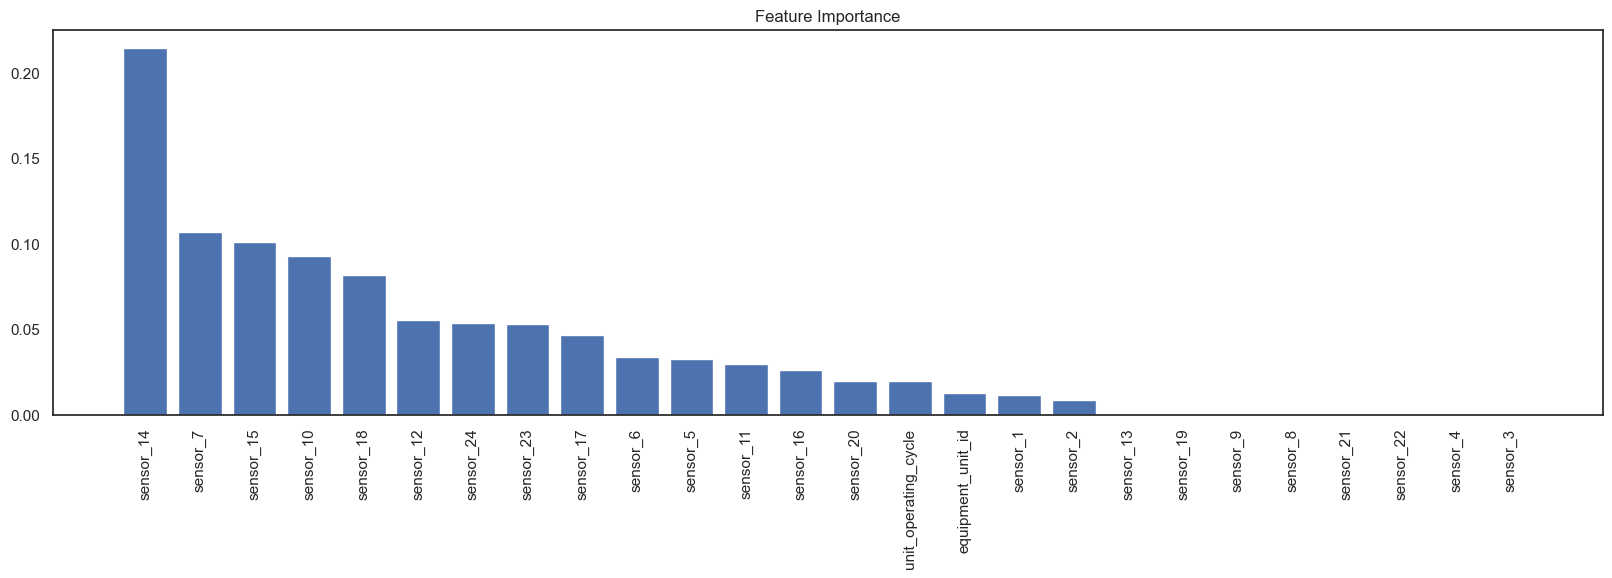

In [33]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create a bar plot
plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In [34]:
# Create a copy of temp2

temp3 = temp2.copy()  # temp3 will host the data with removed features and will be used for modeling

In [35]:
# Drop the features of low importance
low_imp_columns = ['sensor_3', 'sensor_4', 'sensor_8', 'sensor_9', 'sensor_13', 'sensor_21', 'sensor_22']

temp3.drop(columns=low_imp_columns, inplace=True)

In [36]:
temp3.shape

(20631, 20)

## Data Modeling

Considering the historical dataset has many features (many sensor columns), and given the potential for noise and high number of outliers, a tree-based method like Random Forest can be more robust compared to something like K-nearest neighbor. It handles high-dimensionality better and offers feature importance metrics, which can be beneficial for further feature engineering or understanding.

### Train-test split

In [37]:
# Data Splitting into training, validation and testing sets to that the model is evaluated fairly
X = temp3.drop('failure_within_20', axis=1) 
y = temp3['failure_within_20']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

Before we train the data, due to inbalanced class distribution at the target feature failure_within_20, having more 0s than 1s, we need to increase the number of instances in the minority class that is 0, by generating synthetic values. I am using Synthetic Minority Over-sampling Technique (SMOTE) for this.

In [39]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [40]:
# Training a classifier on resampled data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [41]:
# Predictions
y_pred = rf_classifier.predict(X_test)

In [42]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3717
           1       0.79      0.90      0.84       410

    accuracy                           0.97      4127
   macro avg       0.89      0.94      0.91      4127
weighted avg       0.97      0.97      0.97      4127



In [43]:
# Using Cross-Validation to predict the accuracy of the RandomForest Classifier above, here I am using 10 fold CV
accuracy_scores = cross_val_score(rf_classifier, X, y, cv=10, scoring='accuracy')  

In [44]:
#Classification Report using cross validation

print("Accuracy Scores for Each Fold:", accuracy_scores)
print("Mean Accuracy:", accuracy_scores.mean())
print("Standard Deviation of Accuracy:", accuracy_scores.std())

Accuracy Scores for Each Fold: [0.97722868 0.98061076 0.96946195 0.97721764 0.9718856  0.97576345
 0.96800776 0.96073679 0.97624818 0.96897722]
Mean Accuracy: 0.9726138037478347
Standard Deviation of Accuracy: 0.00561730447586191


## Predictions on snapshot data

First we need to preprocess the snapshot data in the same way as our training data

In [45]:
# Create a copy of snapshot

temp4 = snapshot.copy()  # temp4 will be used for all the validation

In [46]:
# Robust scaling 
temp4[sensor_columns] = scaler.transform(temp4[sensor_columns])

In [47]:
# Drop low importance features
temp4.drop(columns=low_imp_columns, inplace=True)

In [48]:
# Predictions on snapshot
predictions = rf_classifier.predict(temp4)

In [49]:
# Creating the result dataframe
result = pd.DataFrame({
    'unit': snapshot['equipment_unit_id'],
    'prediction': predictions
})

final_results = result.groupby('unit').max().reset_index()

print(final_results)

    unit  prediction
0      1           0
1      2           0
2      3           0
3      4           0
4      5           0
5      6           0
6      7           0
7      8           0
8      9           0
9     10           0
10    11           0
11    12           0
12    13           0
13    14           0
14    15           0
15    16           0
16    17           0
17    18           0
18    19           0
19    20           1
20    21           0
21    22           0
22    23           0
23    24           1
24    25           0
25    26           0
26    27           0
27    28           0
28    29           0
29    30           0
30    31           1
31    32           0
32    33           0
33    34           1
34    35           1
35    36           1
36    37           0
37    38           0
38    39           0
39    40           1
40    41           0
41    42           1
42    43           0
43    44           0
44    45           0
45    46           0
46    47     

In [50]:
can_fail_units = final_results[final_results['prediction'] == 1].shape[0]

print(f"Number of units predicted to fail within the next 20 cycles: {can_fail_units}")


Number of units predicted to fail within the next 20 cycles: 19
